In [1]:
from astropy.table import Table
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import itertools
import math
from WiFeS import *

c = 299792.458 #Km/s
%matplotlib inline 

In [2]:
destdir = '/Users/vaishalp/Dropbox/WiFes_Data/'
galaxy_name = ['HIPASSJ0150-47',  'HIPASSJ1758-53',
'HIPASSJ0154-00b', 'HIPASSJ1914-62',
'HIPASSJ0243-29',  'HIPASSJ1932-55',
'HIPASSJ0319-26',  'HIPASSJ1945-54',
'HIPASSJ0330-33',  'HIPASSJ2013-37',
'HIPASSJ0409-56',  'HIPASSJ2015-21',
'HIPASSJ0412-57',  'HIPASSJ2018-16',
'HIPASSJ1251-26',  'HIPASSJ2118-63',
'HIPASSJ1301-35',  'HIPASSJ2153-37',
'HIPASSJ1321-27',  'HIPASSJ2201-31',
'HIPASSJ1342-48b', 'HIPASSJ2224-03',
'HIPASSJ1459-16',  'HIPASSJ2241-44',
'HIPASSJ1503-13',  'HIPASSJ2243-64',
'HIPASSJ1724-59',  'HIPASSJ2334-04']


amp = np.zeros(len(galaxy_name))
NII = np.zeros(len(galaxy_name))
ratio = np.zeros(len(galaxy_name)) 
for ind, gal in enumerate(galaxy_name):
    filename = destdir+ gal + '/central_spec_ppxf_velgas_output_sn15.csv'
    flux_data = Table.read(filename, format = 'ascii.csv')
    NII = flux_data['NII_6583']
    Halpha = flux_data['Halpha']
    print(gal, NII, Halpha)
# #     sigma = flux_data['Sigma'][9]
# #     amp[ind] = 0.3183099*NII[ind]/np.max([1e-15, sigma])
    ratio[ind] = np.log10(NII/Halpha)
galaxy_name = [name for _,name in sorted(zip(ratio,galaxy_name))]
# print(flux_data.info)
# print((galaxy_name))


HIPASSJ0150-47        NII_6583      
---------------------
1.925829943777847e-15         Halpha        
----------------------
1.5949001492354215e-15
HIPASSJ1758-53        NII_6583      
---------------------
1.941067188455544e-15         Halpha        
----------------------
1.4449844506590996e-15
HIPASSJ0154-00b        NII_6583       
----------------------
2.5597541525110806e-15         Halpha        
----------------------
3.0413756891542028e-15
HIPASSJ1914-62        NII_6583       
----------------------
1.5700586690670234e-14         Halpha        
----------------------
1.2134932703970931e-14
HIPASSJ0243-29        NII_6583      
---------------------
1.719948617761439e-14        Halpha       
--------------------
3.54086469228362e-14
HIPASSJ1932-55        NII_6583       
----------------------
1.6807800902622788e-15         Halpha       
---------------------
1.911270194781138e-15
HIPASSJ0319-26       NII_6583      
--------------------
4.20066724909022e-15         Halpha       

/Users/vaishalp/anaconda/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/vaishalp/anaconda/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


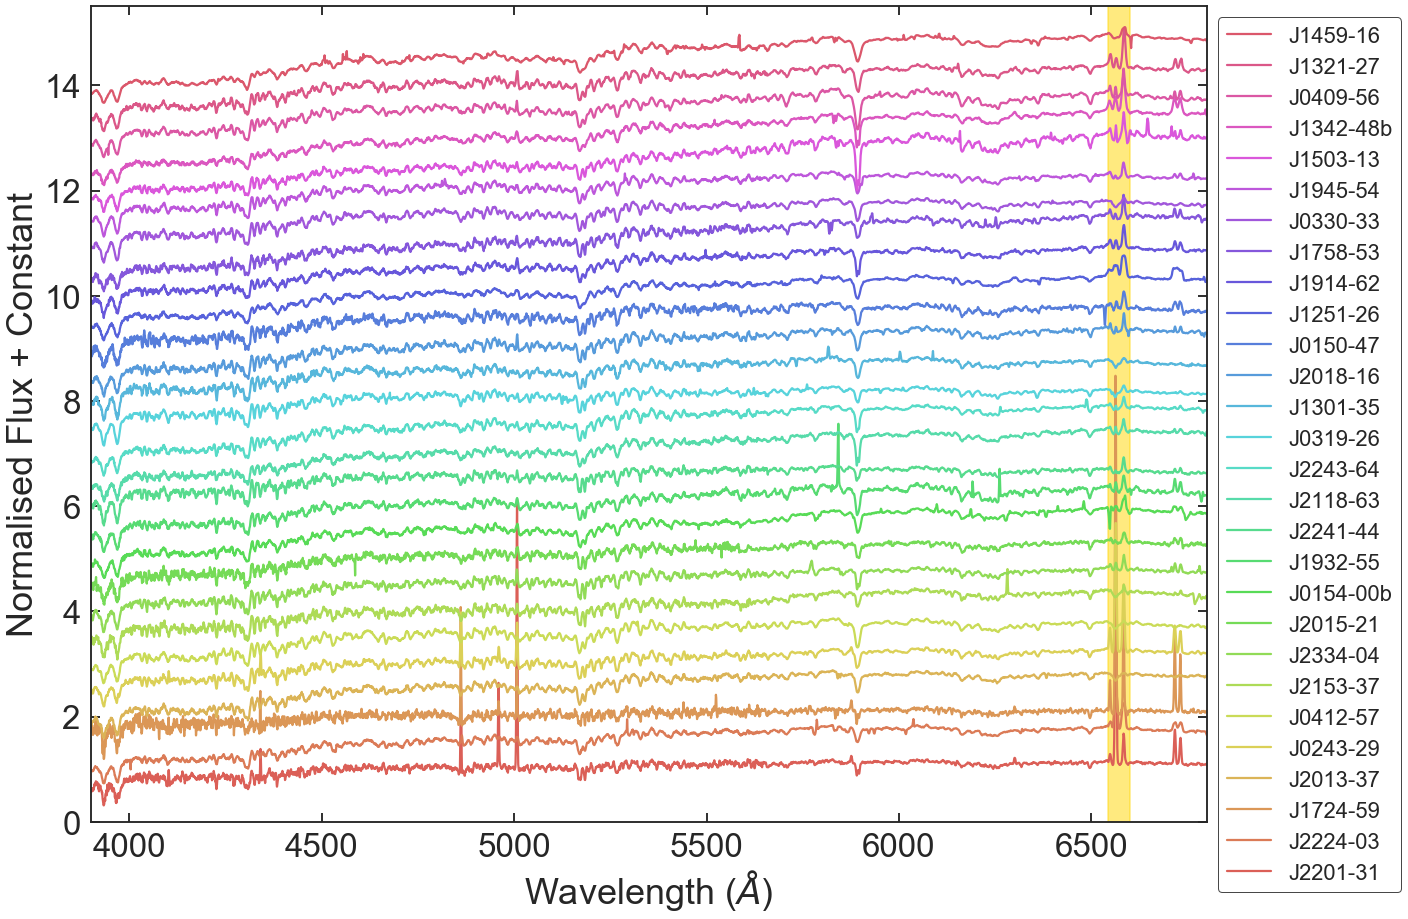

In [3]:
sns.set_context("talk",font_scale=2.0)
sns.set_style("white")
flatui = sns.color_palette("hls", len(galaxy_name))
palette = itertools.cycle(sns.color_palette(flatui))
sns.set_style("ticks",{"xtick.direction": "in","ytick.direction": "in", "xtick.major.size": 8, "ytick.major.size": 8})
fig, ax = plt.subplots(figsize = (20,15))

for ind, gal in enumerate(galaxy_name):
    filename = destdir + gal + '/pPXFoutput_central_spec_sn15.csv'
    fits_data = Table.read(filename, format = 'ascii.csv')
    filename = destdir + gal + '/central_spec_ppxf_velgas_output_sn15.csv'
    fits_v = Table.read(filename, format = 'csv')
    vel = fits_v['V_stellar_vector']
    z = vel/c
    plt.plot(fits_data['wave']/(1 + z), 
             fits_data['galaxy']/np.mean(fits_data['galaxy'])+0.5*ind, 
             color = next(palette), label = gal[6:])   
#/np.mean(fits_data['galaxy'])+0.4*ind,
plt.axvspan(6542,6600,alpha=0.5,color='gold') 
# plt.axvspan(3850,3980,alpha=0.5,color='gold') 
ax.tick_params(axis='x',top='on',pad = 10)
ax.tick_params(axis='y',right='on', pad = 10)
plt.xlim(3900, 6800)
plt.ylim(0.0,15.5)

plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel('Normalised Flux + Constant')


handles, labels = ax.get_legend_handles_labels()
legend = plt.legend(handles[::-1], labels[::-1], loc = 2,  frameon=True, 
                    prop={'size': 22}, ncol=1, bbox_to_anchor=(1, 1))
# 'weight':'bold'},
legend.set_zorder(0)
frame = legend.get_frame()
frame.set_edgecolor('k')
frame.set_lw(1)
plt.savefig('central_spectra_sn15.pdf', bbox_inches='tight')

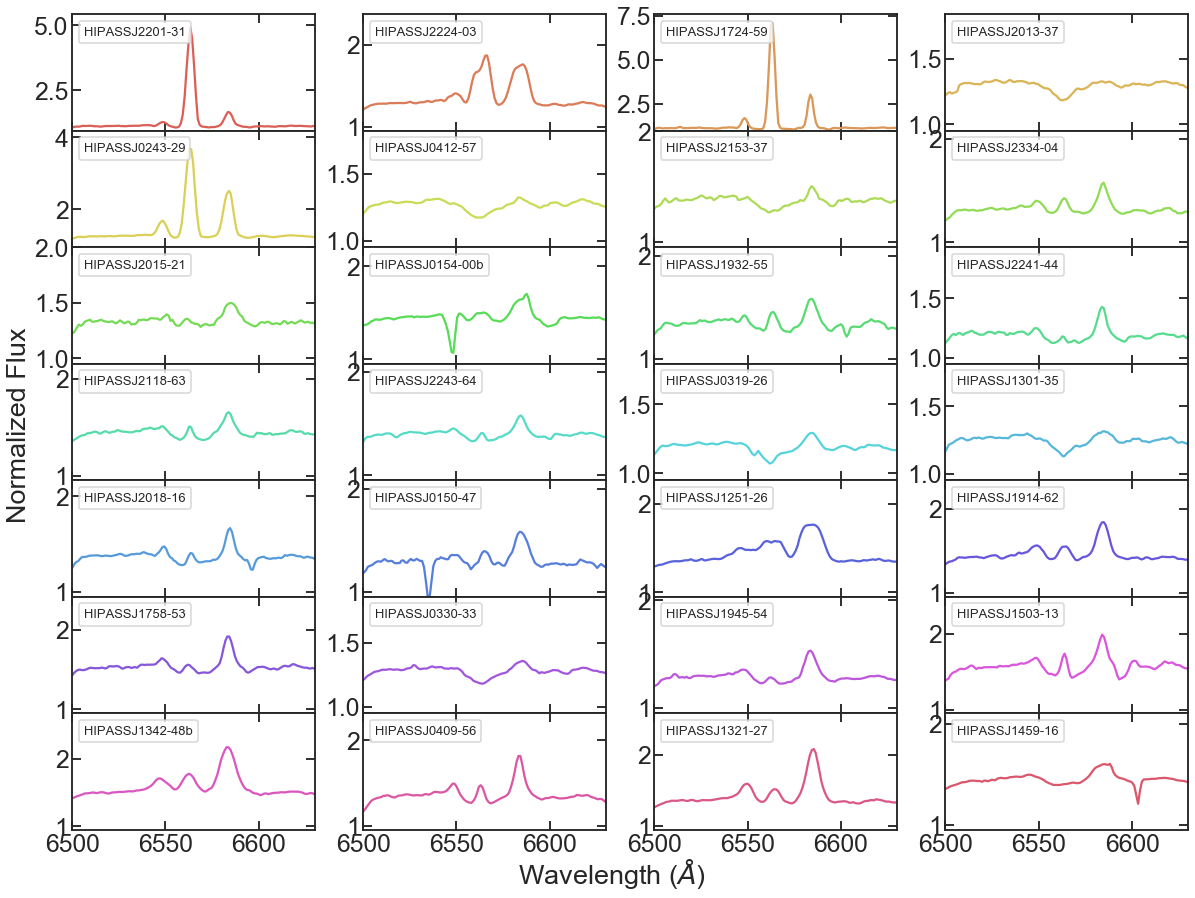

In [4]:
sns.set_context("talk",font_scale=1.5)
sns.set_style("white")
flatui = sns.color_palette("hls", len(galaxy_name))
palette = itertools.cycle(sns.color_palette(flatui))
sns.set_style("ticks",{"xtick.direction": "in","ytick.direction": "in", "xtick.major.size": 8, "ytick.major.size": 8})
fig, ax = plt.subplots(math.ceil(len(galaxy_name)/4),4,figsize = (20,15))
fig.subplots_adjust(hspace=0.0)
for ind, gal in enumerate(galaxy_name):
    filename = destdir + gal + '/pPXFoutput_central_spec.csv'
    fits_data = Table.read(filename, format = 'ascii.csv')
    filename = destdir + gal + '/central_spec_ppxf_velgas_output.csv'
    fits_v = Table.read(filename, format = 'csv')
    vel = fits_v['V_stellar_vector']
    gas = fits_data['galaxy'] - fits_data['stars']
    z = vel/c
    i = math.floor(ind/4.)
    j = int(ind-4.*math.ceil(ind/4.))
    ax[i,j].plot(fits_data['wave']/(1 + z), 
             fits_data['galaxy']/np.mean(fits_data['galaxy']), 
             color = next(palette), label = gal)   
    ax[i,j].set_xlim(6500,6630)
    med = np.mean(fits_data['galaxy']) 
    ymax = np.amax(fits_data['galaxy'][np.where((fits_data['wave']/(1 + z) > 6500) 
                                                & (fits_data['wave']/(1 + z) < 6630))]/ med )
    ax[i,j].set_ylim(0.95,ymax+0.5)
    ax[i,j].tick_params(axis='x',top=True)
    ax[i,j].tick_params(axis='y',right=True)
    ax[i,j].tick_params(labelbottom=False) 
    ax[i,j].legend(loc="upper left", prop={'size': 13}, handlelength=0, handletextpad=0)
for j in range(4):
    ax[math.ceil(len(galaxy_name)/4)-1,j].tick_params(labelbottom=True) 

fig.text(0.5, 0.075, r'Wavelength ($\AA$)', ha='center')
fig.text(0.08, 0.5, 'Normalized Flux', va='center', rotation='vertical')
plt.savefig('Halpha_NII_stars.pdf', bbox_inches='tight')

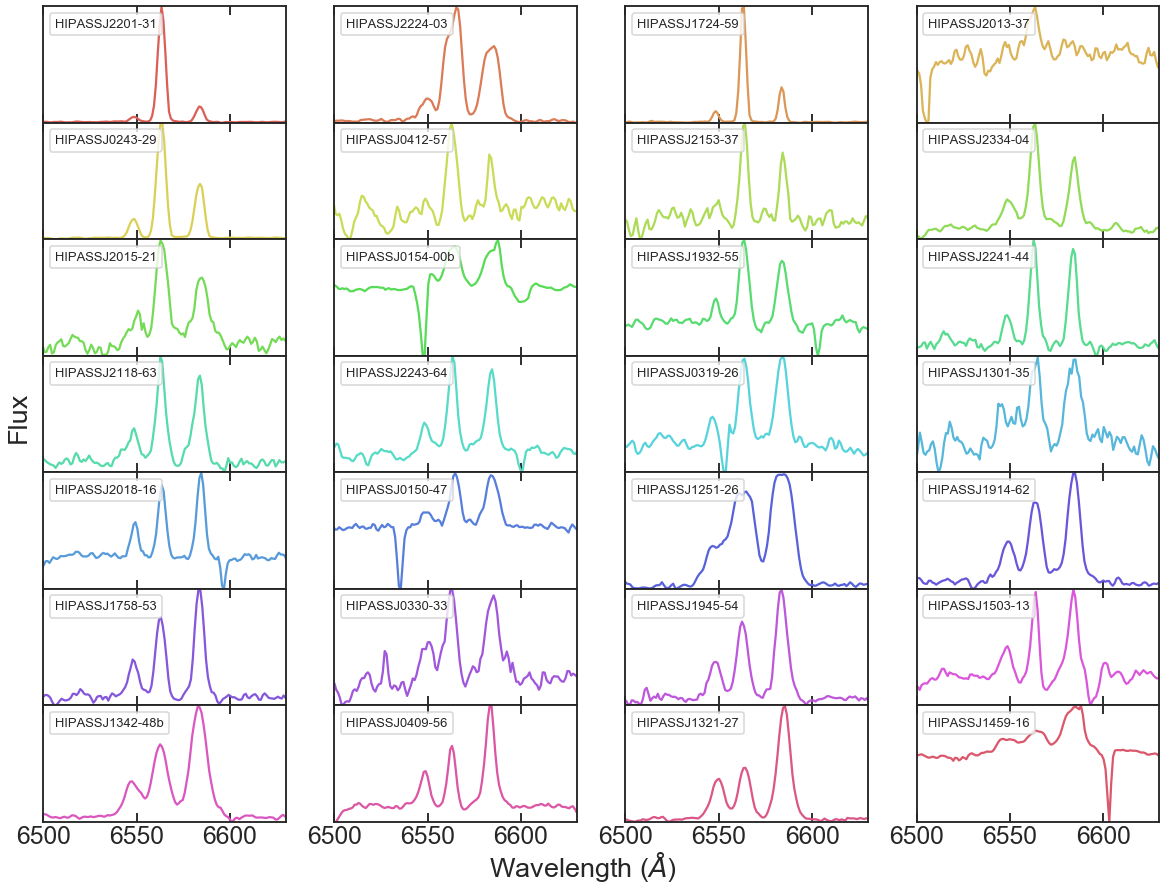

In [5]:
sns.set_context("talk",font_scale=1.5)
sns.set_style("white")
flatui = sns.color_palette("hls", len(galaxy_name))
palette = itertools.cycle(sns.color_palette(flatui))
sns.set_style("ticks",{"xtick.direction": "in","ytick.direction": "in", "xtick.major.size": 8, "ytick.major.size": 8})
fig, ax = plt.subplots(math.ceil(len(galaxy_name)/4),4,figsize = (20,15))
fig.subplots_adjust(hspace=0.0)
for ind, gal in enumerate(galaxy_name):
    filename = destdir + gal + '/pPXFoutput_central_spec.csv'
    fits_data = Table.read(filename, format = 'ascii.csv')
    filename = destdir + gal + '/central_spec_ppxf_velgas_output.csv'
    fits_v = Table.read(filename, format = 'csv')
    vel = fits_v['V_stellar_vector']
    gas = fits_data['galaxy'] - fits_data['stars']
    z = vel/c
    i = math.floor(ind/4.)
    j = int(ind-4.*math.ceil(ind/4.))
    ax[i,j].plot(fits_data['wave']/(1 + z),
             gas, color = next(palette), label = gal)  
    ax[i,j].set_xlim(6500,6630)
    ymax = np.amax(gas[np.where((fits_data['wave']/(1 + z) > 6500) 
                                    & (fits_data['wave']/(1 + z) < 6630))])
    ymin = np.amin(gas[np.where((fits_data['wave']/(1 + z) > 6500) 
                                    & (fits_data['wave']/(1 + z) < 6630))])
    ax[i,j].set_ylim(ymin,ymax+np.mean(gas))
    ax[i,j].ticklabel_format(style='plain')
    ax[i,j].tick_params(axis='x',top=True)
    ax[i,j].tick_params(axis='y',right=False, left = False)
    ax[i,j].tick_params(labelbottom=False,  labelleft=False) 
    ax[i,j].legend(loc="upper left", prop={'size': 13}, handlelength=0, handletextpad=0)
for j in range(4):
    ax[math.ceil(len(galaxy_name)/4)-1,j].tick_params(labelbottom=True) 

fig.text(0.5, 0.075, r'Wavelength ($\AA$)', ha='center')
fig.text(0.1, 0.5, 'Flux', va='center', rotation='vertical')
plt.savefig('Halpha_NII_gas.pdf', bbox_inches='tight')

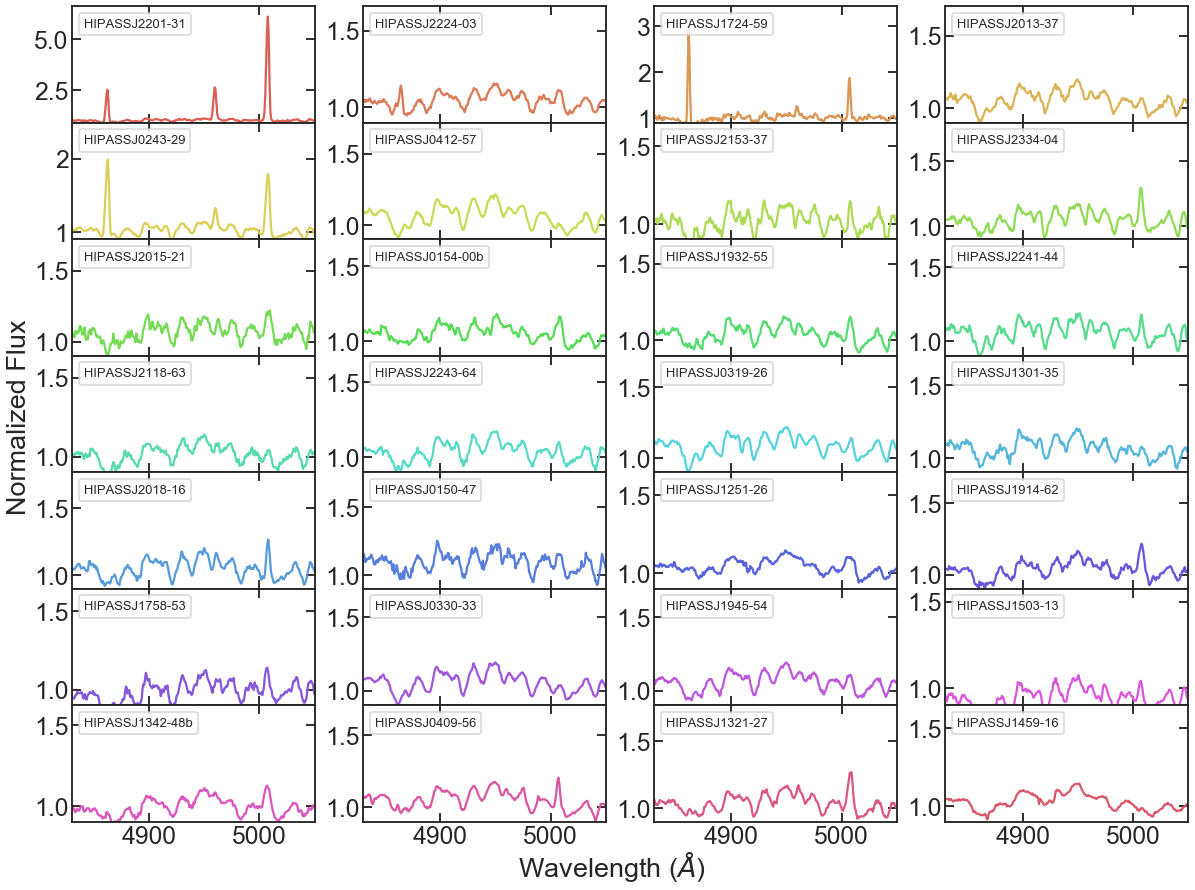

In [6]:
sns.set_context("talk",font_scale=1.5)
sns.set_style("white")
flatui = sns.color_palette("hls", len(galaxy_name))
palette = itertools.cycle(sns.color_palette(flatui))
sns.set_style("ticks",{"xtick.direction": "in","ytick.direction": "in", "xtick.major.size": 8, "ytick.major.size": 8})
fig, ax = plt.subplots(math.ceil(len(galaxy_name)/4),4,figsize = (20,15))
fig.subplots_adjust(hspace=0.0)
for ind, gal in enumerate(galaxy_name):
    filename = destdir + gal + '/pPXFoutput_central_spec.csv'
    fits_data = Table.read(filename, format = 'ascii.csv')
    filename = destdir + gal + '/central_spec_ppxf_velgas_output.csv'
    fits_v = Table.read(filename, format = 'csv')
    vel = fits_v['V_stellar_vector']
    gas = fits_data['galaxy'] - fits_data['stars']
    z = vel/c
    i = math.floor(ind/4.)
    j = int(ind-4.*math.ceil(ind/4.))
    ax[i,j].plot(fits_data['wave']/(1 + z), 
             fits_data['galaxy']/np.mean(fits_data['galaxy']), 
             color = next(palette), label = gal)     
    ax[i,j].set_xlim(4830,5050)
    med = np.mean(fits_data['galaxy']) 
    ymax = np.amax(fits_data['galaxy'][np.where((fits_data['wave']/(1 + z) > 4830) 
                                                & (fits_data['wave']/(1 + z) < 5050))]/ med )
    ax[i,j].set_ylim(0.90,ymax+0.5)
    ax[i,j].tick_params(axis='x',top=True)
    ax[i,j].tick_params(axis='y',right=True)
    ax[i,j].tick_params(labelbottom=False) 
    ax[i,j].legend(loc="upper left", prop={'size': 13}, handlelength=0, handletextpad=0)
for j in range(4):
    ax[math.ceil(len(galaxy_name)/4)-1,j].tick_params(labelbottom=True) 

fig.text(0.5, 0.075, r'Wavelength ($\AA$)', ha='center')
fig.text(0.08, 0.5, 'Normalized Flux', va='center', rotation='vertical')
plt.savefig('Hbeta_OIII_stars.pdf', bbox_inches='tight')


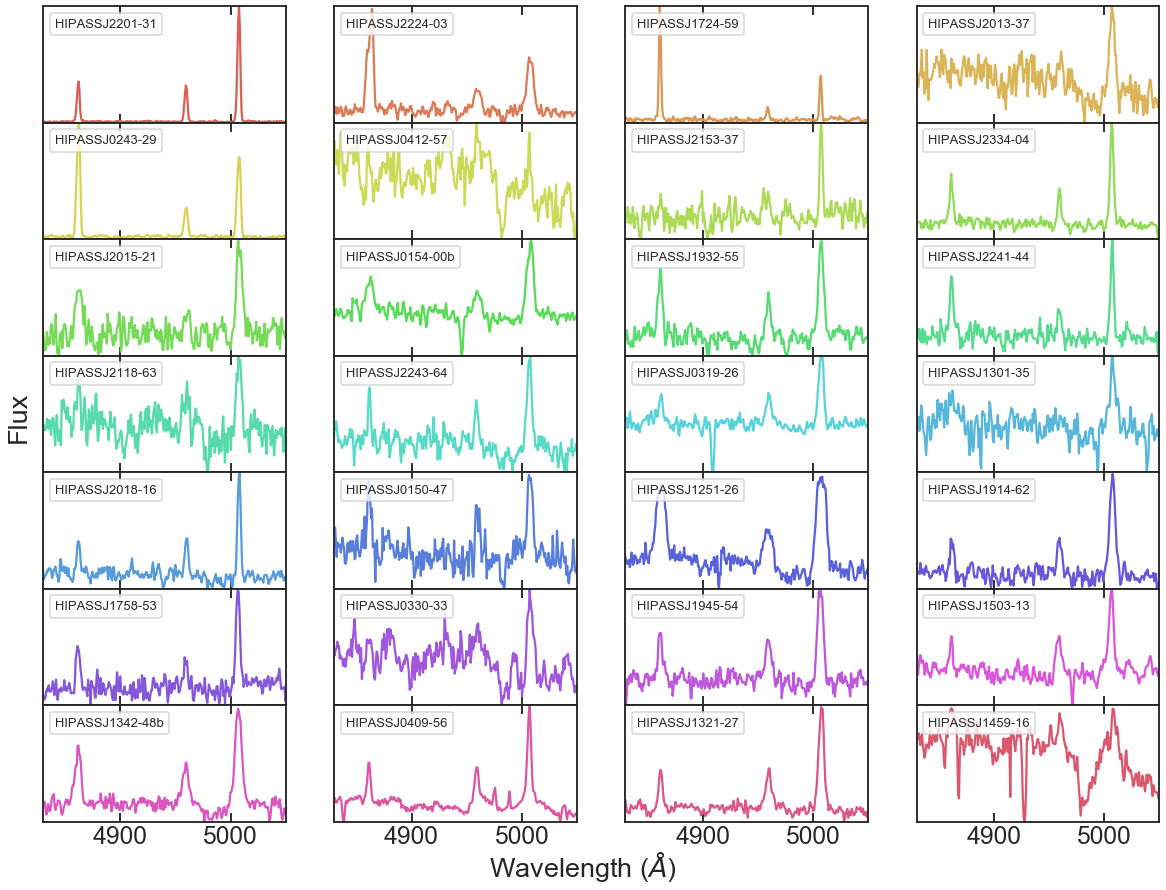

In [7]:
sns.set_context("talk",font_scale=1.5)
sns.set_style("white")
flatui = sns.color_palette("hls", len(galaxy_name))
palette = itertools.cycle(sns.color_palette(flatui))
sns.set_style("ticks",{"xtick.direction": "in","ytick.direction": "in", "xtick.major.size": 8, "ytick.major.size": 8})
fig, ax = plt.subplots(math.ceil(len(galaxy_name)/4),4,figsize = (20,15))
fig.subplots_adjust(hspace=0.0)
for ind, gal in enumerate(galaxy_name):
    filename = destdir + gal + '/pPXFoutput_central_spec.csv'
    fits_data = Table.read(filename, format = 'ascii.csv')
    filename = destdir + gal + '/central_spec_ppxf_velgas_output.csv'
    fits_v = Table.read(filename, format = 'csv')
    vel = fits_v['V_stellar_vector']
    gas = fits_data['galaxy'] - fits_data['stars']
    z = vel/c
    i = math.floor(ind/4.)
    j = int(ind-4.*math.ceil(ind/4.))
    ax[i,j].plot(fits_data['wave']/(1 + z),
             gas, color = next(palette), label = gal)  
    ax[i,j].set_xlim(4830,5050)
    ymax = np.amax(gas[np.where((fits_data['wave']/(1 + z) > 4830) 
                                    & (fits_data['wave']/(1 + z) < 5050))])
    ymin = np.amin(gas[np.where((fits_data['wave']/(1 + z) > 4830) 
                                    & (fits_data['wave']/(1 + z) < 5050))])
    ax[i,j].set_ylim(ymin,ymax+np.mean(gas))
    ax[i,j].ticklabel_format(style='plain')
    ax[i,j].tick_params(axis='x',top=True)
    ax[i,j].tick_params(axis='y',right=False, left = False)
    ax[i,j].tick_params(labelbottom=False,  labelleft=False) 
    ax[i,j].legend(loc="upper left", prop={'size': 13}, handlelength=0, handletextpad=0)
for j in range(4):
    ax[math.ceil(len(galaxy_name)/4)-1,j].tick_params(labelbottom=True) 

fig.text(0.5, 0.075, r'Wavelength ($\AA$)', ha='center')
fig.text(0.1, 0.5, 'Flux', va='center', rotation='vertical')
plt.savefig('Hbeta_OIII_gas.pdf', bbox_inches='tight')

/Users/vaishalp/Dropbox/Office_mac/python_code/myfunction/WiFeS.py:889: RuntimeWarning: invalid value encountered in log10
  low, high = np.log10(ratio - ratio_err), np.log10(ratio + ratio_err)


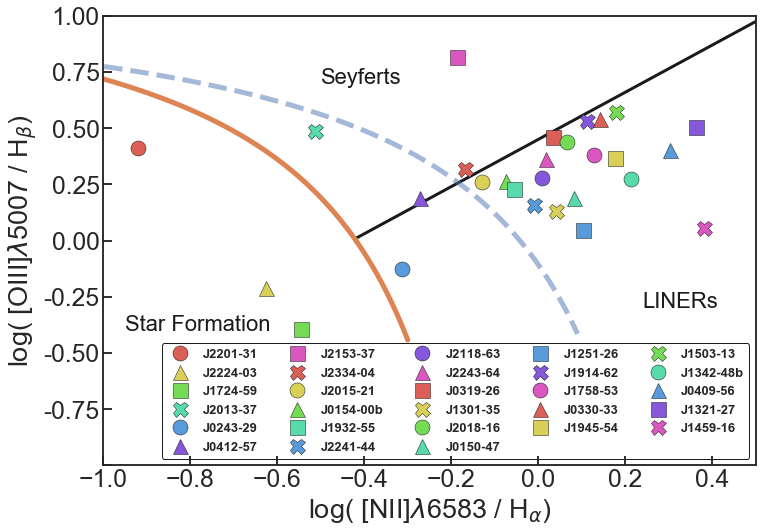

In [8]:
###BPT DIAGRAM
sns.set_context("talk",font_scale=1.5)
sns.set_style("white")
flatui = sns.color_palette("hls", math.ceil(len(galaxy_name)/4.))
palette = itertools.cycle(sns.color_palette(flatui))
sns.set_style("ticks",{"xtick.direction": "in","ytick.direction": "in", "xtick.major.size": 8, "ytick.major.size": 8})
plt.rcParams['figure.figsize']=(11.7, 8.27)
fig, ax = plt.subplots(1, sharex='col', sharey='row')
fig.subplots_adjust(hspace=0, wspace=0,)

# Schawinski et al. (2007): log([O III]/Hβ) = 1.05 log([N II]/Hα) + 0.45.
x = np.arange(-0.42,1.,0.01)
y = 1.05*x+0.45
plt.plot(x,y,'k', lw = 3)

# Kewley et al. (2001) eq 5
x = np.arange(-1.5,0.3,0.01)
y = 0.61/(x-0.47)+1.19
plt.plot(x[np.where(y > -0.43)],y[np.where(y > -0.43)], '--',lw = 5, alpha = 0.5)

# Kauffmann et al. (2003): log([O III]/Hβ) > 0.61/{log([N II]/Hα) − 0.05} + 1.3
x = np.arange(-1.5,-0.1,0.01)
y = 0.61/(x-0.05) + 1.3
plt.plot(x[np.where(y > -0.45)],y[np.where(y > -0.45)], lw = 5)

ax.text(0.24, -0.3,'LINERs', color='k', fontsize=22)
ax.text(-0.5,0.7, 'Seyferts', color='k', fontsize=22)
ax.text(-0.95,-0.4,'Star Formation ', color='k', fontsize=22)

sym = itertools.cycle(['o','^','s','X'])
NII_Ha, NII_Ha_err = np.zeros(len(galaxy_name)), np.zeros(len(galaxy_name))
OIII_Hb, OIII_Hb_err = np.zeros(len(galaxy_name)) , np.zeros(len(galaxy_name))
for ind, gal in enumerate(galaxy_name):
    filename = destdir+ gal + '/central_spec_ppxf_velgas_output_sn15.csv'
    flux_data = Table.read(filename, format = 'ascii.csv')
    NII, NII_err = flux_data['NII_6583'], flux_data['NII_6583_err']
    Halpha, Halpha_err = flux_data['Halpha'], flux_data['Halpha_err']
    Hbeta, Hbeta_err = flux_data['Hbeta'], flux_data['Hbeta_err']
    OIII, OIII_err = flux_data['OIII_5007'], flux_data['OIII_5007_err']
    x, x_err = flux_ratio(NII, NII_err, Halpha, Halpha_err)
    y, y_err = flux_ratio(OIII, OIII_err, Hbeta, Hbeta_err)
#     print(x_err)
    plt.plot(x,y,next(sym), color = next(palette),
             ms = 15, markeredgewidth=0.5, markeredgecolor='k',
             label = gal[6:])
#     plt.errorbar(x,y,yerr = y_err, xerr = x_err, c ='k', label ="")
    NII_Ha[ind], NII_Ha_err[ind] = x, x_err
    OIII_Hb[ind], OIII_Hb_err[ind] = y, y_err
ax.set_ylabel(r'log( [OIII]$\lambda$5007 / H$_{\beta}$)')
ax.set_xlabel(r'log( [NII]$\lambda$6583 / H$_{\alpha}$)')
plt.xlim(-1.,0.5)
plt.ylim(-1.,1.)

labels = [item.get_text() for item in ax.get_yticklabels()]
labels = ['', '-0.75', '-0.50', '-0.25', '0.00', '0.25',
          '0.50', '0.75', '1.00']
ax.set_yticklabels(labels)
legend = plt.legend(loc = 4, frameon=True, 
                    prop={'size': 13, 'weight':'bold'}, ncol=5,
                   markerscale = 1,fancybox=True, framealpha=1)
legend.set_zorder(0)
frame = legend.get_frame()
frame.set_edgecolor('k')
frame.set_lw(1)
# print(NII_Ha_err.mean(), np.mean(OIII_Hb_err))
# plt.errorbar([-0.75],[0],yerr = np.mean(OIII_Hb_err),
#              xerr = np.mean(NII_Ha_err), c ='k', label ="")

plt.savefig('BPT_central_sn15.pdf', bbox_inches='tight')


In [9]:
radius = 1.5
SN = 3
result = np.full(( 3,len(galaxy_name)), 0)
spec_class  = np.full(len(galaxy_name), 'types')
for ind, gal in enumerate(galaxy_name):
    if gal == 'HIPASSJ1459-16':
        gal = 'HIPASSJ1459-16/21July'
        result[:,ind] = Spec_Class(destdir, gal, radius, SN)
    else:
        result[:,ind] = Spec_Class(destdir, gal, radius, SN)
        
    if result[0,ind] == 1:
        spec_class[ind] = 'SF'  
    if result[0,ind] == 2:
        spec_class[ind] = 'Sy'
    if result[0,ind] == 3:
        if result[2,ind] == 1:
            spec_class[ind] = 'LIER'
        else:
            spec_class[ind] = 'LINER'
    print(gal, spec_class[ind])
    
filename = 'flux_ratio_central_sn15.csv'
dat = Table([galaxy_name, NII_Ha, NII_Ha_err, OIII_Hb, 
                       OIII_Hb_err, spec_class], \
                names=("Galaxy", "NII_Ha", "NII_Ha_err", "OIII_Hb", 
                       "OIII_Hb_err", "type") )
dat.write(filename, format='csv', overwrite=True)

HIPASSJ2201-31 SF
HIPASSJ2224-03 SF
HIPASSJ1724-59 SF
HIPASSJ2013-37 Sy
HIPASSJ0243-29 LIER
HIPASSJ0412-57 Sy
HIPASSJ2153-37 Sy
HIPASSJ2334-04 Sy


/Users/vaishalp/Dropbox/Office_mac/python_code/myfunction/WiFeS.py:886: RuntimeWarning: divide by zero encountered in true_divide
  ratio = x/y
/Users/vaishalp/Dropbox/Office_mac/python_code/myfunction/WiFeS.py:888: RuntimeWarning: divide by zero encountered in true_divide
  ratio_err = np.sqrt( (xerr**2/x**2) + (yerr**2/y**2) )
/Users/vaishalp/Dropbox/Office_mac/python_code/myfunction/WiFeS.py:889: RuntimeWarning: invalid value encountered in subtract
  low, high = np.log10(ratio - ratio_err), np.log10(ratio + ratio_err)
/Users/vaishalp/Dropbox/Office_mac/python_code/myfunction/WiFeS.py:889: RuntimeWarning: invalid value encountered in log10
  low, high = np.log10(ratio - ratio_err), np.log10(ratio + ratio_err)
/Users/vaishalp/Dropbox/Office_mac/python_code/myfunction/WiFeS.py:887: RuntimeWarning: divide by zero encountered in log10
  ratio_log = np.log10(ratio)


HIPASSJ2015-21 LIER
HIPASSJ0154-00b LIER


/Users/vaishalp/Dropbox/Office_mac/python_code/myfunction/WiFeS.py:886: RuntimeWarning: invalid value encountered in true_divide
  ratio = x/y


HIPASSJ1932-55 LIER
HIPASSJ2241-44 LIER
HIPASSJ2118-63 LIER
HIPASSJ2243-64 LIER


/Users/vaishalp/Dropbox/Office_mac/python_code/myfunction/WiFeS.py:891: RuntimeWarning: Mean of empty slice.
  ratio_err_log = diff[~np.isnan(diff)].mean()
/Users/vaishalp/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


HIPASSJ0319-26 LIER
HIPASSJ1301-35 LIER
HIPASSJ2018-16 LIER
HIPASSJ0150-47 LIER
HIPASSJ1251-26 LIER
HIPASSJ1914-62 LIER
HIPASSJ1758-53 LIER
HIPASSJ0330-33 LIER
HIPASSJ1945-54 LIER
HIPASSJ1503-13 LIER
HIPASSJ1342-48b LIER
HIPASSJ0409-56 LIER
HIPASSJ1321-27 LIER
HIPASSJ1459-16/21July LINER
